### NYU CDS

### Fall 2021

### Introduction to Data Science

### Project 2

### student netid: KJ2062

### deadline: Dec 06, 2021, 11:59pm

---
# Data analysis Project 2
### Correlation and Regression of Movie Ratings Data
---

### Dataset description

This dataset features ratings data of 400 movies from 1097 research participants. 

* 1st row: Headers (Movie titles/questions) – note that the indexing in this list is from 1
* Row 2-1098: Responses from individual participants
* Columns 1-400: These columns contain the ratings for the 400 movies (0 to 4, and missing)
* Columns 401-421: These columns contain self-assessments on sensation seeking behaviors (1-5)
* Columns 422-464: These columns contain responses to personality questions (1-5)
* Columns 465-474: These columns contain self-reported movie experience ratings (1-5)
* Column 475: Gender identity (1 = female, 2 = male, 3 = self-described)
* Column 476: Only child (1 = yes, 0 = no, -1 = no response)
* Column 477: Movies are best enjoyed alone (1 = yes, 0 = no, -1 = no response)

Note that we did most of the data munging for you already (e.g. Python interprets commas in a csv file as separators, so we removed all commas from movie titles), but you still need to handle missing data.

In [1]:
import warnings
warnings.filterwarnings('ignore')




### Q1:


**Note:** For all missing values in the data, use the average of the corresponding column so to fill in the missing data. 



In this problem, under **the most correlated**, we consider the largest correlation in the absolute value.


1.1. For every user in the given data, find its most correlated user. 

1.2. What is the pair of the most correlated users in the data? 

1.3. What is the value of this highest correlation?

1.4. For users 0, 1, 2, \dots, 9, print their most correlated users. 



# Importing libraries

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
data = np.genfromtxt('movieReplicationSet.csv', delimiter = ',',skip_header = 1)
data

array([[nan, nan, 4. , ..., 1. , 0. , 1. ],
       [nan, nan, 1.5, ..., 1. , 0. , 0. ],
       [nan, nan, nan, ..., 1. , 1. , 0. ],
       ...,
       [nan, nan, nan, ..., 1. , 0. , 0. ],
       [nan, nan, nan, ..., 1. , 0. , 1. ],
       [nan, nan, 4. , ..., 1. , 0. , 1. ]])

## Subsuting values with the average value

In [3]:
p_value = []
count = 0
sum = 0
a = np.empty((1097,477))
for i in range(477):
    temp = data[:,i:i+1]
    temp2  = np.isfinite(data[:,i:i+1])
    temp = temp[temp2]
    avg = np.mean(temp)
    #print(avg)
    for j in range(len(temp2)):
        if temp2[j] == True:
            a[j][i] = data[j,i]
        else:
            a[j][i] = avg
a = np.abs(a.T) 


## Creating Covarience Matrix

In [32]:
r = np.corrcoef(a.T,rowvar=True)

x,y =r.shape
x,y

(1097, 1097)

# Calculating Most corelated value for each user

In [38]:
import pandas as pd
x,y =r.shape
max = r[1][0]
index = (1,0)
lst = []
abc = pd.DataFrame(r)
print(abc)
# output
for i in range(1097):
    print("for user "+str(i)+" the correlated data of user is", end=' ')
    print(abc[i].nlargest(2).index.tolist()[1])
    
    
    

          0         1         2         3         4         5         6     \
0     1.000000  0.498760  0.384046  0.261681  0.282152  0.393259  0.307592   
1     0.498760  1.000000  0.674541  0.474953  0.370120  0.511028  0.409035   
2     0.384046  0.674541  1.000000  0.470761  0.455412  0.534223  0.511076   
3     0.261681  0.474953  0.470761  1.000000  0.306632  0.293671  0.337585   
4     0.282152  0.370120  0.455412  0.306632  1.000000  0.290762  0.319114   
...        ...       ...       ...       ...       ...       ...       ...   
1092  0.396831  0.639712  0.727102  0.510979  0.503175  0.492716  0.474558   
1093  0.247870  0.405895  0.442432  0.320725  0.275692  0.190907  0.280785   
1094  0.343938  0.569560  0.676489  0.511524  0.431892  0.433795  0.399275   
1095  0.466774  0.623822  0.543327  0.445523  0.438762  0.458041  0.378338   
1096  0.379034  0.470596  0.511760  0.479785  0.358226  0.227394  0.343090   

          7         8         9     ...      1087      1088    

for user 128 the correlated data of user is 896
for user 129 the correlated data of user is 896
for user 130 the correlated data of user is 896
for user 131 the correlated data of user is 588
for user 132 the correlated data of user is 233
for user 133 the correlated data of user is 974
for user 134 the correlated data of user is 831
for user 135 the correlated data of user is 831
for user 136 the correlated data of user is 623
for user 137 the correlated data of user is 675
for user 138 the correlated data of user is 831
for user 139 the correlated data of user is 831
for user 140 the correlated data of user is 63
for user 141 the correlated data of user is 249
for user 142 the correlated data of user is 1095
for user 143 the correlated data of user is 831
for user 144 the correlated data of user is 896
for user 145 the correlated data of user is 183
for user 146 the correlated data of user is 63
for user 147 the correlated data of user is 415
for user 148 the correlated data of user 

for user 487 the correlated data of user is 660
for user 488 the correlated data of user is 986
for user 489 the correlated data of user is 595
for user 490 the correlated data of user is 831
for user 491 the correlated data of user is 863
for user 492 the correlated data of user is 896
for user 493 the correlated data of user is 831
for user 494 the correlated data of user is 957
for user 495 the correlated data of user is 249
for user 496 the correlated data of user is 831
for user 497 the correlated data of user is 249
for user 498 the correlated data of user is 747
for user 499 the correlated data of user is 779
for user 500 the correlated data of user is 896
for user 501 the correlated data of user is 932
for user 502 the correlated data of user is 896
for user 503 the correlated data of user is 348
for user 504 the correlated data of user is 362
for user 505 the correlated data of user is 913
for user 506 the correlated data of user is 1092
for user 507 the correlated data of use

for user 827 the correlated data of user is 831
for user 828 the correlated data of user is 569
for user 829 the correlated data of user is 831
for user 830 the correlated data of user is 831
for user 831 the correlated data of user is 896
for user 832 the correlated data of user is 767
for user 833 the correlated data of user is 896
for user 834 the correlated data of user is 333
for user 835 the correlated data of user is 896
for user 836 the correlated data of user is 588
for user 837 the correlated data of user is 675
for user 838 the correlated data of user is 555
for user 839 the correlated data of user is 19
for user 840 the correlated data of user is 594
for user 841 the correlated data of user is 300
for user 842 the correlated data of user is 649
for user 843 the correlated data of user is 247
for user 844 the correlated data of user is 683
for user 845 the correlated data of user is 730
for user 846 the correlated data of user is 896
for user 847 the correlated data of user 

for user 1062 the correlated data of user is 896
for user 1063 the correlated data of user is 333
for user 1064 the correlated data of user is 255
for user 1065 the correlated data of user is 284
for user 1066 the correlated data of user is 649
for user 1067 the correlated data of user is 896
for user 1068 the correlated data of user is 211
for user 1069 the correlated data of user is 162
for user 1070 the correlated data of user is 671
for user 1071 the correlated data of user is 30
for user 1072 the correlated data of user is 831
for user 1073 the correlated data of user is 347
for user 1074 the correlated data of user is 896
for user 1075 the correlated data of user is 896
for user 1076 the correlated data of user is 831
for user 1077 the correlated data of user is 896
for user 1078 the correlated data of user is 831
for user 1079 the correlated data of user is 831
for user 1080 the correlated data of user is 300
for user 1081 the correlated data of user is 269
for user 1082 the cor

## calculating correlatd matrix for the first 10 users.

In [8]:
for i in range(10):
    print("for user "+str(i)+" the correlated data of user is", end=' ')
    print(abc[i].nlargest(2).index.tolist()[1])

for user 0 the correlated data of user is 583
for user 1 the correlated data of user is 831
for user 2 the correlated data of user is 896
for user 3 the correlated data of user is 896
for user 4 the correlated data of user is 896
for user 5 the correlated data of user is 99
for user 6 the correlated data of user is 239
for user 7 the correlated data of user is 850
for user 8 the correlated data of user is 896
for user 9 the correlated data of user is 1004


# Getting the most correlated user value with the index 

In [9]:
import pandas as pd
x,y =r.shape
lst = []
indexes = []
abc = pd.DataFrame(r)
 
# output
for i in range(1097):
    indexes.append(abc[i].nlargest(2).index.tolist())
    lst.append(abc[i].nlargest(2).tolist()[1])
max = np.max(np.array(lst))
print("The most coorelated data is of user" ,end=" ")
print(indexes[lst.index(max)])
print("the value of correlation of these users is "+str(max))

The most coorelated data is of user [831, 896]
the value of correlation of these users is 0.9994513305109192


## most corelated pair from top 10 users

In [10]:
x,y =r.shape
max = r[1][0]
index = (1,0)
lst = []
for i in range(10):
    for j in range(i):
        #print(" index ",end=" ")
        #print((i,j), end=" ")
        #print(r[i][j])
        if r[i][j]>max:
            max = r[i][j]
            index = (i,j)
print(max)
print(index)

0.6745412373080147
(2, 1)


# finding corelation by comaring with individual taking too much time 

In [33]:
# x,y =r.shape
# max = r[1][0]
# index = (1,0)
# lst = []
# for i in range(x):
#     for j in range(i):
#         print(" index ",end=" ")
#         print((i,j), end=" ")
#         print(r[i][j])
#         if r[i][j]>max:
#             max = r[i][j]
#             index = (i,j)



In [34]:
# print(max)
# print(index)

In [35]:
# r,c =a.shape
# print(r)
# max= 0
# index = (0,1)

# #print(a)
# X = np.empty((r,2))
# for i in range(c):
#     for j in range(i+1,c):
#         if j == 897 and i==0:
#             continue
#         X[:,0:1] = a[:,i:i+1]
#         X[:,1:2] = a[:,j:j+1]
#         corr = np.corrcoef(X.T)
#         print((i,j),end=" ")
#         print(corr[0][1])
#         if np.abs(corr[0][1]) > max:
#             max = corr[0][1]
#             index = (i,j)
# print(index,end=" ")
# print(max)

In [36]:
# print(lst)

In [37]:
# print(np.corrcoef(a,rowvar=False)[0][583])

### Q2:

We want to find a model between the ratings and the personal part of the data. To do so, consider:


**Part 1**: the ratings of all users over columns 1-400: 

-- Columns 1-400: These columns contain the ratings for the 400 movies (0 to 4, and missing);

call this part `df_rate`


and 


**Part 2**:  the part of the data which includes all users over columns 401-474

-- Columns 401-421: These columns contain self-assessments on sensation seeking behaviors (1-5)

-- Columns 422-464: These columns contain responses to personality questions (1-5)

-- Columns 465-474: These columns contain self-reported movie experience ratings (1-5)

call this part `df_pers`.

---

Our main task is to model: 


`df_pers = function(df_rate)`


---

**Note:** Split the original data into training and testing as the ratio 0.80: 0.20. 


2.1. Model `df_pers = function(df_rate)` by using the linear regression. 

What are the errors on: (i) the training part; (ii) the testing part?




2.2. Model `df_pers = function(df_rate)` by using the ridge regression with hyperparamter values alpha from [0.0, 1e-8, 1e-5, 0.1, 1, 10]. 

For every of the previous values for alpha, what are the errors on: (i) the training part; (ii) the testing part?

What is a best choice for alpha?



2.3. Model `df_pers = function(df_rate)` by using the lasso regression with hyperparamter values alpha from [1e-3, 1e-2, 1e-1, 1]. 

For every of the previous values for alpha, what are the errors on: (i) the training part; (ii) the testing part?

What is a best choice for alpha?


**Note**: Ignore any `convergence warning` in case you may obtain in the Lasso regression.




# creating seprate matrix for y

In [39]:
p_value = []
count = 0
sum = 0
b = np.empty((1097,74))
for i in range(400,474):
    temp = data[:,i:i+1]
    temp2  = np.isfinite(data[:,i:i+1])
    temp = temp[temp2]
    avg = np.mean(temp)
    
    for j in range(len(temp2)):
        if temp2[j] == True:
            b[j][i-400] = data[j,i]
        else:
            b[j][i-400] = avg
print(b.shape)

(1097, 74)


# splitting data

In [40]:

# split a dataset into train and test sets

from sklearn.model_selection import train_test_split
# create dataset
X, y = a.T[:,0:400],b[:,0:74]
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(877, 400) (220, 400) (877, 74) (220, 74)


# running linear regression model

In [41]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
regr = linear_model.LinearRegression() # linearRegression function from linear_model
regr.fit(X_train,y_train) # use fit method 
y_pred = regr.predict(X_test)
y_tpred = regr.predict(X_train)
rSqr = regr.score(X_train,y_train)
print(rSqr)
rSqr = regr.score(X_test,y_test)
print("Test error:", mean_squared_error(y_pred,y_test))
print("Train error:", mean_squared_error(y_tpred,y_train))
print(rSqr)

0.49750539135857685
Test error: 3.4278770535666574
Train error: 0.6209387257797491
-1.8119645759305727


# running ridge model 

In [42]:
from sklearn.linear_model import Ridge
lst = [1e-8,1e-5,0,0.1, 1,10]
test = []
train = []
for i in lst:
    reg = linear_model.Ridge(alpha=i)
    clf = reg.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    y_tpred = clf.predict(X_train)
    test.append(mean_squared_error(y_pred,y_test))
    train.append(mean_squared_error(y_tpred,y_train))
    print("Test error:", mean_squared_error(y_pred,y_test), end=" ")
    print("Train error:", mean_squared_error(y_tpred,y_train))

Test error: 3.427877041023517 Train error: 0.6209387257797492
Test error: 3.4278645105006493 Train error: 0.6209387257812718
Test error: 3.4278770535667196 Train error: 0.6209387257797491
Test error: 3.3139165918726587 Train error: 0.6210696293436193
Test error: 2.758832989494785 Train error: 0.6265753398234599
Test error: 1.8291674753239577 Train error: 0.6803156752147645


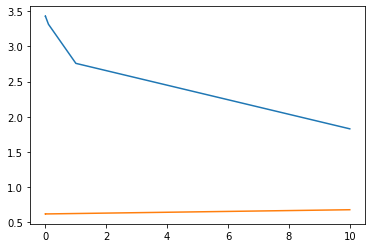

In [43]:
import matplotlib.pyplot as plt
plt.plot(lst,test)
plt.plot(lst,train)
plt.show()

# running lasso model 

In [44]:
lst = [1e-3, 1e-2, 1e-1, 1]
test = []
train = []
from sklearn.linear_model import Lasso
for i in lst:
    reg = Lasso(alpha=i)
    clf = reg.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    y_tpred = clf.predict(X_train)
    test.append(mean_squared_error(y_pred,y_test))
    train.append(mean_squared_error(y_tpred,y_train))
    print("Test error:", mean_squared_error(y_pred,y_test), end=" ")
    print("Train error:", mean_squared_error(y_tpred,y_train))

Test error: 2.284333833471119 Train error: 0.6452672450144072
Test error: 1.3216633075788375 Train error: 0.9050398848578627
Test error: 1.2180680678788978 Train error: 1.2179093993062762
Test error: 1.227241247580254 Train error: 1.2357122148206903


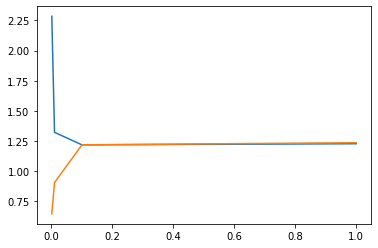

In [45]:
import matplotlib.pyplot as plt
plt.plot(lst,test)
plt.plot(lst,train)
plt.show()